In [ ]:
from fastai.vision.all import *
from fastai.metrics import error_rate, accuracy
import warnings
warnings.filterwarnings('ignore')
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
path = Path("/content/drive/My Drive/SIH Datasets/Type_of_damage_dataset")

In [ ]:
dls = DataBlock(
    blocks=(ImageBlock, CategoryBlock), 
    get_items=get_image_files, 
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    # item_tfms=[Resize(192, method='squish')],
    item_tfms=[Resize(192)],
    batch_tfms=aug_transforms(mult=2)
).dataloaders(path)

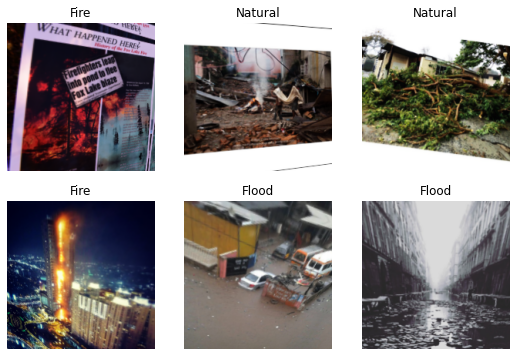

In [ ]:
dls.show_batch(max_n=6)

In [ ]:
learn = vision_learner(dls, resnet50, metrics=accuracy)
learn.fine_tune(5)

Downloading: "https://download.pytorch.org/models/resnet50-0676ba61.pth" to /root/.cache/torch/hub/checkpoints/resnet50-0676ba61.pth


  0%|          | 0.00/97.8M [00:00<?, ?B/s]

epoch,train_loss,valid_loss,accuracy,time
0,1.468484,0.895537,0.807143,07:43


epoch,train_loss,valid_loss,accuracy,time
0,0.856908,0.913993,0.782143,09:54
1,0.717706,0.928309,0.814286,10:00
2,0.621400,0.677890,0.832143,09:53
3,0.519133,0.645476,0.860714,09:54
4,0.439296,0.611031,0.867857,09:56


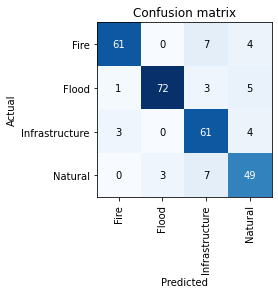

In [ ]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

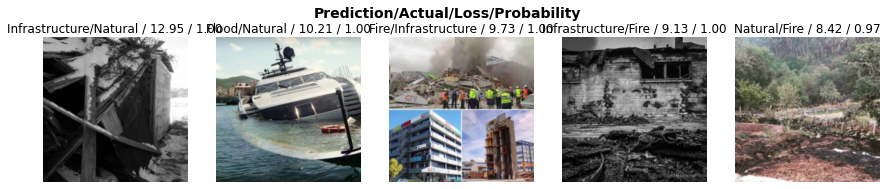

In [ ]:
interp.plot_top_losses(5, nrows=1)

In [ ]:
learn.export('model.pkl')